# Firstly, import libraries :

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset :

In [2]:
data = pd.read_csv("../input/eda-dataclean/Dataclean.csv")
data.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S


# Convert into DataFrame :

In [3]:
df = pd.DataFrame(data)


# EDA consists of :

Treating Missing Values, Treatment Of Outliers, Feature Engineering

# Get Data type and info :

In [4]:
df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


# TypeConversion Of Datatype :

 Here, in data we have 'object' datatype ,so we have to convert it into required datatype 
 ex : month is numeric datatype so we can't perform stats on 'object' data type so we have to convert it into 'float'
 
 
> from info we get 'object' data type for 'Temp c', 'Month', 'Weather'

In [5]:
df["Month"] = pd.to_numeric(df["Month"], errors='coerce')
df["Temp C"] = pd.to_numeric(df["Temp C"], errors='coerce')
df["Weather"] = df["Weather"].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  158 non-null    int64   
 1   Ozone       120 non-null    float64 
 2   Solar.R     151 non-null    float64 
 3   Wind        158 non-null    float64 
 4   Temp C      157 non-null    float64 
 5   Month       157 non-null    float64 
 6   Day         158 non-null    int64   
 7   Year        158 non-null    int64   
 8   Temp        158 non-null    int64   
 9   Weather     155 non-null    category
dtypes: category(1), float64(5), int64(4)
memory usage: 11.5 KB


 # Drop Column :
 
 Here, First column is just index so we do not that , so drop 1st column from df and assign new dataframe df2

In [6]:
df2 = df.iloc[:,1:]
df2.describe()

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp
count,120.000000,151.000000,158.000000,157.000000,157.000000,158.000000,158.0,158.000000
mean,41.583333,185.403974,9.957595,77.751592,7.044586,16.006329,2010.0,77.727848
std,32.620709,88.723103,3.511261,9.403120,1.433768,8.997166,0.0,9.377877
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000,2010.0,56.000000
25%,18.000000,119.000000,7.400000,72.000000,6.000000,8.000000,2010.0,72.000000
50%,30.500000,197.000000,9.700000,79.000000,7.000000,16.000000,2010.0,78.500000
75%,61.500000,257.000000,11.875000,84.000000,8.000000,24.000000,2010.0,84.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000,2010.0,97.000000


# Remove Duplicate Method :

In [7]:
df2[df2.duplicated()]                         #this will give duplicate value
df2[df2.duplicated()].shape                   # this will give shape of how many rows has buplicate data


(1, 9)

# Drop Duplicate Data :

In [8]:
df2_cleaned1 = df2.drop_duplicates()                   #this is how to drop duplicate row data
df2_cleaned1.shape

(157, 9)

# Clean Unneccessery Column :

 Drop 'Temp C' column from dataset 

In [9]:
df2_cleaned2 = df2_cleaned1.drop('Temp C', axis = 1)  # to drop columns from data to clean it

# Rename Column Name :

  change 'Solar.R' column name to 'solar'

In [10]:
df2_cleaned3 = df2_cleaned2.rename({'Solar.R' : 'solar'}, axis = 1)        #to rename the columnname

# Outlier Detection :

To find Outliers we have to visulize data

Here, we're using 'Ozone' column data to find outliers

using histogram :

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([28., 36., 21.,  9., 11.,  7.,  3.,  2.,  1.,  1.]),
 array([  1. ,  17.7,  34.4,  51.1,  67.8,  84.5, 101.2, 117.9, 134.6,
        151.3, 168. ]),
 <a list of 10 Patch objects>)

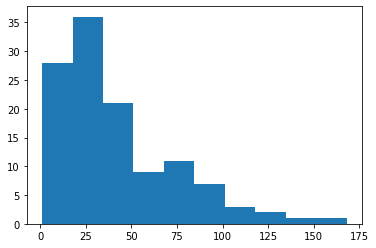

In [11]:
plt.hist(df2_cleaned3["Ozone"])

using Boxplot :

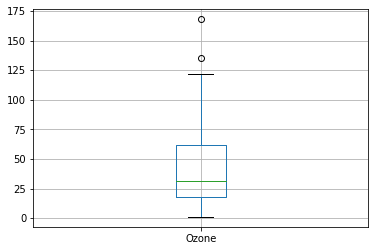

In [12]:
df2_cleaned3.boxplot(column=["Ozone"])

# Retrive the outlier data :

 From above fig. we can see that the outliers lie above 125.

In [13]:
df2_cleaned3[df2_cleaned3.Ozone>125]

,Ozone,solar,Wind,Month,Day,Year,Temp,Weather
61,135.0,269.0,4.1,7.0,1,2010,84,S
116,168.0,238.0,3.4,8.0,25,2010,81,PS


# Remove the row which have outlier data :

In [14]:
df2_cleaned3.drop([61, 116])

,Ozone,solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


# Categorical Data :

 visulization of categorical data 

S     59
C     49
PS    47
Name: Weather, dtype: int64

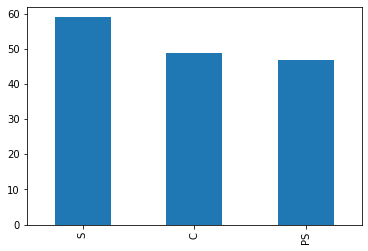

In [15]:
df['Weather'].value_counts().plot.bar()
df['Weather'].value_counts()

# Missing Values and Imputation :

 identify howmany missing values lies

In [16]:
df2_cleaned3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    119 non-null    float64 
 1   solar    150 non-null    float64 
 2   Wind     157 non-null    float64 
 3   Month    156 non-null    float64 
 4   Day      157 non-null    int64   
 5   Year     157 non-null    int64   
 6   Temp     157 non-null    int64   
 7   Weather  154 non-null    category
dtypes: category(1), float64(4), int64(3)
memory usage: 15.1 KB


# Visulization of missing value using Heatmap :

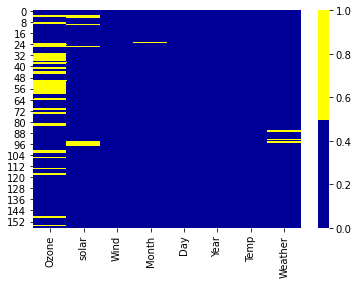

In [17]:
cols = df2_cleaned3.columns
colours = ["#000099", "#ffff00"]
sns.heatmap(df2_cleaned3[cols].isnull(), cmap=sns.color_palette(colours))


# Row vise Null value detection :

In [18]:
df2_cleaned3[df2_cleaned3.isnull().any(axis=1)].shape

(46, 8)

above output shows that we have 46 missing values in 8 column

# Imputation :

 To replace missing values with some logical value
 ~ if outliers are removed from data then use mean imputation 
 ~ if outliers are not removed from data then use median imputation
 ~ if data is categorical then use mode imputation 
 

# Mean Imputation :

In [19]:
df2_cleaned3.isnull().sum()  # sum of null values within each column

Ozone      38
solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [20]:
mean = df2_cleaned3["Ozone"].mean()     # mean of 'Ozone' column data
mean

41.81512605042017

# Fill null value :

 Here, we're filling null values with mean of data

In [21]:
df2_cleaned3["Ozone"] = df2_cleaned3["Ozone"].fillna(mean)
df2_cleaned3["Ozone"]

0      41.000000
1      36.000000
2      12.000000
3      18.000000
4      41.815126
         ...    
152    20.000000
153    41.000000
154    30.000000
155    41.815126
157    18.000000
Name: Ozone, Length: 157, dtype: float64

Check Data info :

In [22]:
df2_cleaned3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    157 non-null    float64 
 1   solar    150 non-null    float64 
 2   Wind     157 non-null    float64 
 3   Month    156 non-null    float64 
 4   Day      157 non-null    int64   
 5   Year     157 non-null    int64   
 6   Temp     157 non-null    int64   
 7   Weather  154 non-null    category
dtypes: category(1), float64(4), int64(3)
memory usage: 15.1 KB


# For 'solar' column :

In [23]:
mean_s = df2_cleaned3["solar"].mean()
mean_s

185.36666666666667

Fill null value in 'solar' column

In [24]:
df2_cleaned3["solar"] = df2_cleaned3["solar"].fillna(mean_s)
df2_cleaned3["solar"]

0      190.000000
1      118.000000
2      149.000000
3      313.000000
4      185.366667
          ...    
152    223.000000
153    190.000000
154    193.000000
155    145.000000
157    131.000000
Name: solar, Length: 157, dtype: float64

In [25]:
df2_cleaned3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    157 non-null    float64 
 1   solar    157 non-null    float64 
 2   Wind     157 non-null    float64 
 3   Month    156 non-null    float64 
 4   Day      157 non-null    int64   
 5   Year     157 non-null    int64   
 6   Temp     157 non-null    int64   
 7   Weather  154 non-null    category
dtypes: category(1), float64(4), int64(3)
memory usage: 15.1 KB


In [26]:
mode = df2_cleaned3["Weather"].mode()
mode

0    S
Name: Weather, dtype: category
Categories (3, object): ['C', 'PS', 'S']

Fill null value in 'Weather' column :

In [27]:
df2_cleaned3["Weather"] = df2_cleaned3["Weather"].fillna('S')     # mode of weather is 'S'
df2_cleaned3["Weather"]

0       S
1       C
2      PS
3       S
4       S
       ..
152     S
153     C
154    PS
155     S
157     C
Name: Weather, Length: 157, dtype: category
Categories (3, object): ['C', 'PS', 'S']

In [28]:
df2_cleaned3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    157 non-null    float64 
 1   solar    157 non-null    float64 
 2   Wind     157 non-null    float64 
 3   Month    156 non-null    float64 
 4   Day      157 non-null    int64   
 5   Year     157 non-null    int64   
 6   Temp     157 non-null    int64   
 7   Weather  157 non-null    category
dtypes: category(1), float64(4), int64(3)
memory usage: 15.1 KB


For 'Month' column :

In [29]:
mean_m = df2_cleaned3["Month"].mean()
mean_m

7.032051282051282

Fill null value in 'Month' column 

In [30]:
df2_cleaned3["Month"] = df2_cleaned3["Month"].fillna(7)     # here we use 7.032 = 7, bcz month is intiger value
df2_cleaned3["Month"]

0      5.0
1      5.0
2      5.0
3      5.0
4      5.0
      ... 
152    9.0
153    5.0
154    9.0
155    9.0
157    9.0
Name: Month, Length: 157, dtype: float64

In [31]:
df2_cleaned3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    157 non-null    float64 
 1   solar    157 non-null    float64 
 2   Wind     157 non-null    float64 
 3   Month    157 non-null    float64 
 4   Day      157 non-null    int64   
 5   Year     157 non-null    int64   
 6   Temp     157 non-null    int64   
 7   Weather  157 non-null    category
dtypes: category(1), float64(4), int64(3)
memory usage: 15.1 KB


Data Received after performing some cleaning and filling operation, data is ready to perform or estimante prediction.